<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.1.3

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualize the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
house_hold_csv = "Family_Income_and_Expenditure.csv"
# Read CSV
df = pd.read_csv("../../data/Family_Income_and_Expenditure.csv")

In [4]:
# Head
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [4]:
# Tail
df.tail()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0
41543,128598,XII - SOCCSKSARGEN,78195,Enterpreneurial Activities,1,43485,41205,1985,7735,2062,...,0,0,0,0,0,1,0,0,0,0


In [5]:
# Shape
df.shape

(41544, 60)

In [6]:
# Data Types
df.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

Text(0.5, 1.0, 'Total Household Income')

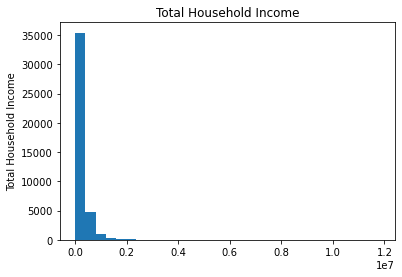

In [7]:
# ANSWER
plt.hist(df['Total Household Income'], bins=30)
plt.ylabel("Total Household Income")
plt.title("Total Household Income")

##### 2. How would you describe the shape of this population?

**ANSWER:**
This distribution is postively skewed. Not normally distributed. We may need some transformation to be performed. 

##### 2. What is the mean income of this population?

In [16]:
# ANSWER
df["Total Household Income"].mean()

247555.58480165608

In [17]:
df["Total Household Income"].describe()

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: Total Household Income, dtype: float64

##### 3. What sampling statistic/point estimate would you use to estimate the mean of this population if you were given a random sample from the population?

**ANSWER:**

#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5. 

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [17]:
# ANSWER
sample_means = []

for i in range(1,11): 
    sample_means.append(df['Total Household Income'].sample(n=5).mean())

sample_means

[278055.0,
 253352.4,
 181151.2,
 213624.0,
 170874.2,
 228022.2,
 268029.0,
 527988.2,
 157625.8,
 294432.8]

###### 4.A Make a histogram of all the sample means

(array([6., 3., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([146147.  , 209217.78, 272288.56, 335359.34, 398430.12, 461500.9 ,
        524571.68, 587642.46, 650713.24, 713784.02, 776854.8 ]),
 <BarContainer object of 10 artists>)

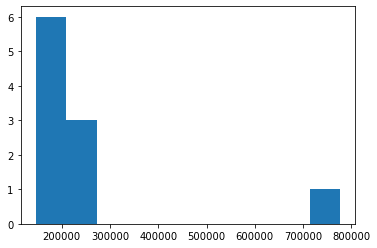

In [10]:
# ANSWER
plt.hist(sample_means)

###### 4.B Describe the shape of the histogram.

**ANSWER:**

In [ ]:
# shape is all over the place. It is not normally distributed

##### 7. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

In [20]:
# ANSWER
sample_means_1000_15 = []

for i in range(1,1001): 
    sample_means_1000_15.append(df['Total Household Income'].sample(n=15).mean())

sample_means_1000_15

[381395.4,
 158067.8,
 365442.6666666667,
 284199.06666666665,
 161519.86666666667,
 199848.2,
 291779.5333333333,
 285132.26666666666,
 220292.8,
 197293.26666666666,
 224057.8,
 295177.5333333333,
 176747.8,
 299449.5333333333,
 176423.13333333333,
 179645.06666666668,
 235714.6,
 207941.33333333334,
 273915.13333333336,
 193786.53333333333,
 224479.4,
 266238.2,
 168610.13333333333,
 259402.06666666668,
 214422.73333333334,
 308654.26666666666,
 266825.26666666666,
 505452.26666666666,
 154647.26666666666,
 331572.93333333335,
 271924.8,
 300790.4666666667,
 269773.0,
 332331.86666666664,
 311124.86666666664,
 200047.8,
 275806.26666666666,
 357234.4666666667,
 198861.0,
 295306.26666666666,
 298109.13333333336,
 177513.13333333333,
 234784.33333333334,
 224872.33333333334,
 166287.8,
 301256.73333333334,
 254210.8,
 180827.73333333334,
 270615.86666666664,
 359614.3333333333,
 362792.13333333336,
 225105.93333333332,
 334751.6666666667,
 225056.2,
 192117.46666666667,
 387374.33333

(array([ 22.,  74., 132., 166., 166., 140., 112.,  73.,  52.,  26.,  15.,
          6.,   5.,   4.,   1.,   3.,   2.,   0.,   0.,   1.]),
 array([120423.73333333, 145527.58      , 170631.42666667, 195735.27333333,
        220839.12      , 245942.96666667, 271046.81333333, 296150.66      ,
        321254.50666667, 346358.35333333, 371462.2       , 396566.04666667,
        421669.89333333, 446773.74      , 471877.58666667, 496981.43333333,
        522085.28      , 547189.12666667, 572292.97333333, 597396.82      ,
        622500.66666667]),
 <BarContainer object of 20 artists>)

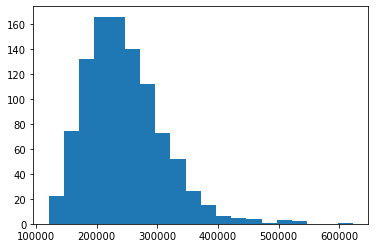

In [22]:
plt.hist(sample_means_1000_15, bins=20)

##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

In [25]:
# ANSWER
sample_means_1000_50 = []

for i in range(1,1001): 
    sample_means_1000_50.append(df['Total Household Income'].sample(n=50).mean())

sample_means_1000_50

[192463.16,
 488996.78,
 211152.86,
 215722.36,
 204803.54,
 258222.46,
 278381.98,
 239211.08,
 275396.7,
 254083.4,
 236590.76,
 276020.66,
 194759.06,
 191981.56,
 288618.78,
 267598.52,
 226088.46,
 139589.26,
 288191.36,
 331880.46,
 224632.74,
 219461.28,
 286469.24,
 229263.02,
 230009.58,
 235626.04,
 248068.38,
 215105.18,
 251215.32,
 221609.12,
 244309.52,
 323433.64,
 223335.84,
 219623.66,
 175962.68,
 251012.9,
 228385.76,
 202615.9,
 324757.28,
 210108.72,
 247406.78,
 227269.26,
 304134.2,
 265763.88,
 298452.88,
 187313.56,
 291222.48,
 274300.52,
 253815.78,
 230607.72,
 256562.3,
 290461.6,
 179247.86,
 212415.02,
 189976.38,
 205936.18,
 227942.68,
 315512.08,
 339679.38,
 277142.04,
 241890.78,
 271105.1,
 254954.98,
 227459.42,
 212994.76,
 218618.48,
 301234.86,
 276028.8,
 232254.88,
 286718.24,
 267932.84,
 216513.52,
 270221.0,
 212574.54,
 260310.32,
 246642.24,
 283299.58,
 206775.66,
 272922.34,
 242894.46,
 307112.5,
 195750.22,
 278912.3,
 332178.04,
 224

(array([  3.,   5.,  42., 100., 179., 185., 165., 134.,  87.,  43.,  20.,
         18.,   5.,   8.,   3.,   0.,   0.,   1.,   0.,   2.]),
 array([139589.26 , 157059.636, 174530.012, 192000.388, 209470.764,
        226941.14 , 244411.516, 261881.892, 279352.268, 296822.644,
        314293.02 , 331763.396, 349233.772, 366704.148, 384174.524,
        401644.9  , 419115.276, 436585.652, 454056.028, 471526.404,
        488996.78 ]),
 <BarContainer object of 20 artists>)

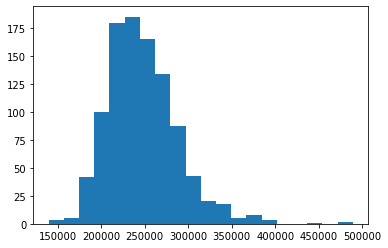

In [27]:
plt.hist(sample_means_1000_50, bins=20)

###### 8.A Describe the shape of the histogram of sample means (using sample size of 50)

**ANSWER:**

###### 8.B What is mean of the distribution of sample means?

In [32]:
# ANSWER
print(np.mean(sample_means))
print(np.mean(sample_means_1000_15))
print(np.mean(sample_means_1000_50))
print(df['Total Household Income'].mean())

257315.47999999998
245384.35166666665
247638.03906
247555.58480165608


**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

###### 8.C As the sample size grew, did your results confirm the CLT?

**ANSWER:**

In [ ]:
# Yes it is closer to the population mean as the sample size grow.



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



